# Exercise - 05/05/2002

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considering **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression

***

In [1]:
#importing used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#loading the dataset
df = pd.read_csv('datasets/weight-height.csv')

In [4]:
#showing basic info about the dataset
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Gender'].drop_duplicates()

0         Male
5000    Female
Name: Gender, dtype: object

The dataset has 10000 lines and three columns, divided in two genders only.

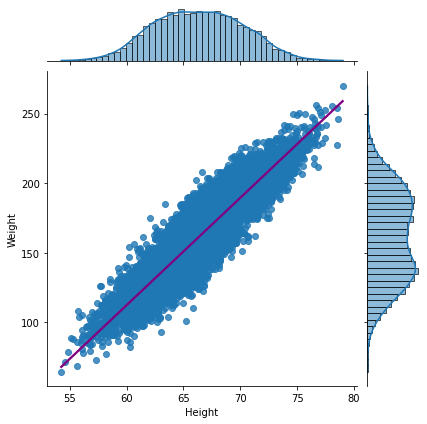

In [7]:
#visualizing the data dispersion
sns.jointplot(data=df, x='Height', y='Weight', kind='reg', joint_kws={'line_kws':{'color':'purple'}})

***

1- Split the dataset into 80% for training and 20% for testing

In [8]:
X = df[['Height']] #independent variable
y = df[['Weight']] #dependent variable

In [9]:
#splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1215)

In [10]:
#shape of the test data
print(f'X_train size: {X_train.shape[0]}\nX_test size: {X_test.shape[0]}\ny_train size: {y_train.shape[0]}\ny_test size: {y_test.shape[0]}')

X_train size: 8000
X_test size: 2000
y_train size: 8000
y_test size: 2000


The train/test set is split 80/20

2 - Compute the correlation between the training set variables

In [11]:
corr_set = df['Height'].corr(df['Weight'])
corr_train = X_train['Height'].corr(y_train['Weight'])
print(f'The general correlation of the weight and height in the whole dataset is {corr_set:.4f}. For the training set it is {corr_train:.4f}.')

The general correlation of the weight and height in the whole dataset is 0.9248. For the training set it is 0.9237.


3 - Train a regression model considering **height** as the independent variable and **weight** as the dependent one

In [12]:
reg = LinearRegression()

In [13]:
#The set was already divided using height as independent variable and weight as the dependent one
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f'The intercept of this regression (theta0) is {reg.intercept_[0]:.4f}, and the coefficient (theta1, slope) is {reg.coef_[0][0]:.4f}.')

The intercept of this regression (theta0) is -351.4145, and the coefficient (theta1, slope) is 7.7281.


4 - Compute the model determination coefficient

In [15]:
R2 = reg.score(X_train,y_train)
print(f'The model determination coefficient (R²) is {R2:.4f}. It explains {R2:.2%} of the variance.')

The model determination coefficient (R²) is 0.8532. It explains 85.32% of the variance.


5 - Plot a scatterplot of the two variables containing the regression model (line)

In [16]:
regression_x = X_train['Height'].to_numpy()
regression_y = reg.predict(X_train).ravel()

<AxesSubplot:title={'center':'Regression with training data'}, xlabel='Height', ylabel='Weight'>

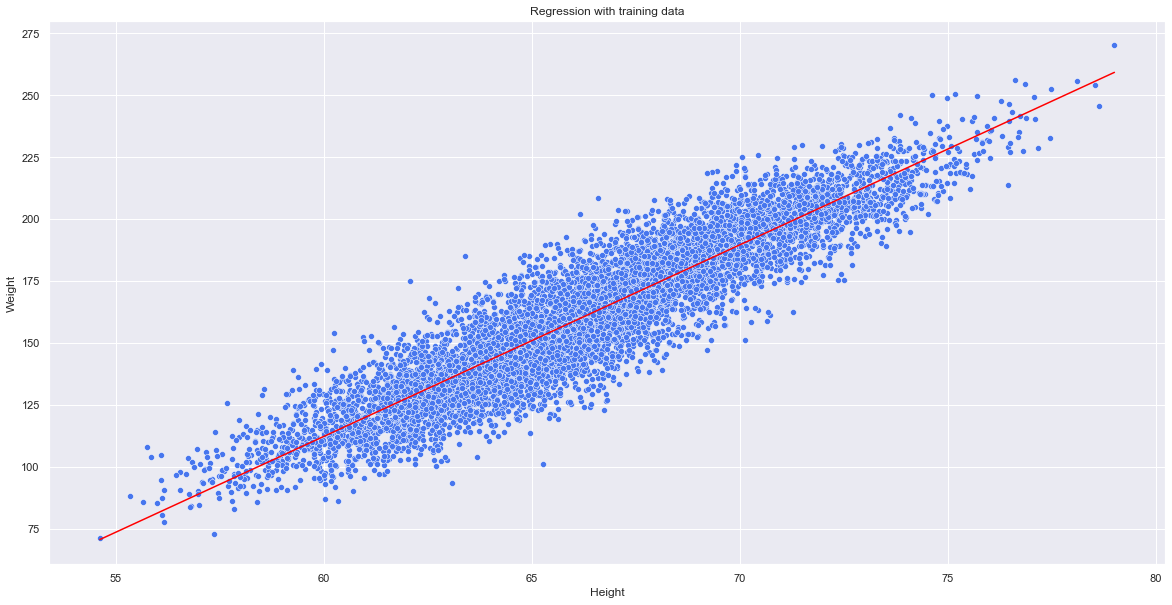

In [17]:
sns.set(palette='turbo', rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=X_train['Height'], y = y_train['Weight']).set(title ='Regression with training data')
sns.lineplot(x=regression_x, y = regression_y, color ='red')

6 Predict the test set

In [18]:
prediction_x = X_test['Height'].to_numpy()
prediction_y = reg.predict(X_test).ravel()

7 Plot a scatterplot of the two variables containing the regression model (line)

<AxesSubplot:title={'center':'Regression with test data'}, xlabel='Height', ylabel='Weight'>

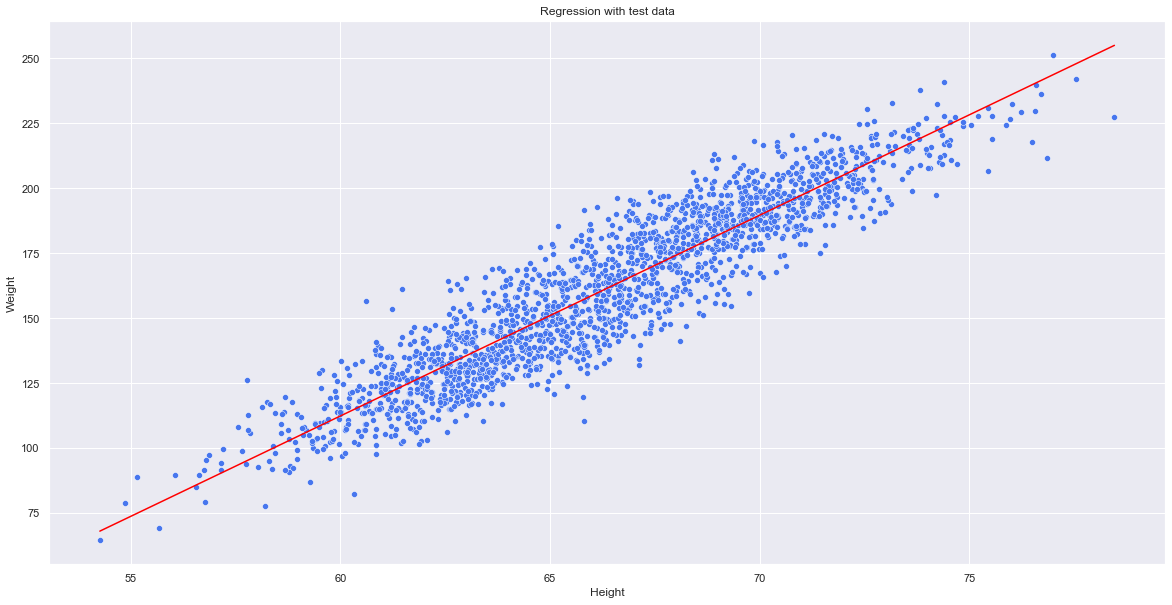

In [19]:
sns.set(palette='turbo', rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=X_test['Height'], y = y_test['Weight']).set(title ='Regression with test data')
sns.lineplot(x = prediction_x, y = prediction_y, color ='red')

8 Compute error metrics for regression

In [20]:
#Setting the array with predicted variables
y_pred = reg.predict(X_test).round(2)

In [21]:
#Computing the mean absolute error
print(f'The Mean Absolute Error (MAE) of this regression is: {mean_absolute_error(y_test, y_pred):.4f}')

The Mean Absolute Error (MAE) of this regression is: 9.5779


In [22]:
##Computing the mean squared error
print(f'The Mean Squared Error (MSE) of this regression is: {mean_squared_error(y_test, y_pred):.4f}')

The Mean Squared Error (MSE) of this regression is: 144.3364


In [23]:
##Computing the root mean squared error
print(f'The Mean Squared Error (RMSE) of this regression is: {mean_squared_error(y_test, y_pred, squared=False):.4f}.')

The Mean Squared Error (RMSE) of this regression is: 12.0140.


In [24]:
#Finally, computing the R²
print(f'The model determination coefficient (R²) is {R2:.4f}.')

The model determination coefficient (R²) is 0.8532.


***

## For extra credits

The dataset has 10000 lines and three columns: Height and Weight, divided by two genders only.

We can also make two copies of the set for each gender so we can if the regression performs differently.

In [25]:
#Making a separated 'males' dataset
df_males = df.groupby(df.Gender).get_group('Male')
df_males = df_males.drop('Gender', axis=1, inplace=False)
print(f'Our dataset now only have the value of the males, organized in {df_males.columns[0]} and {df_males.columns[1]}')
df_males.head()

Our dataset now only have the value of the males, organized in Height and Weight


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [26]:
#Repeating the steps for the 'females' dataset
df_females = df.groupby(df.Gender).get_group('Female')
df_females = df_females.drop('Gender', axis=1, inplace=False)
print(f'This dataset now only have the value of the females, organized in {df_females.columns[0]} and {df_females.columns[1]}')
df_females.head()

This dataset now only have the value of the females, organized in Height and Weight


,Height,Weight
5000,58.910732,102.088326
5001,65.230013,141.305823
5002,63.369004,131.041403
5003,64.479997,128.171511
5004,61.793096,129.781407


Text(0.5, 0.98, 'Data dispersion between males and females')

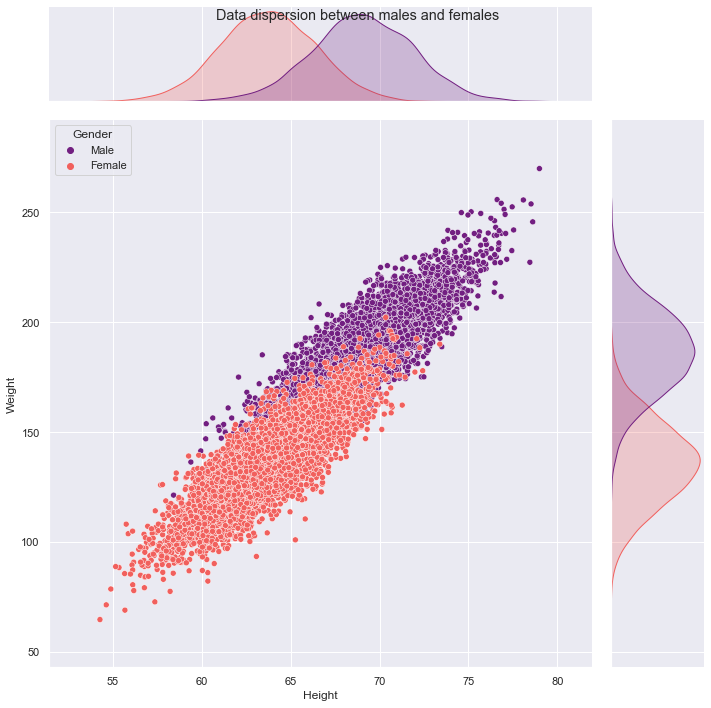

In [50]:
#visualizing the data dispersion of both genders
sns.jointplot(data=df,x='Height', y='Weight', hue='Gender', height=10, palette='magma').fig.suptitle('Data dispersion between males and females')

Text(0.5, 0.98, "Plotting of the male's dataset")

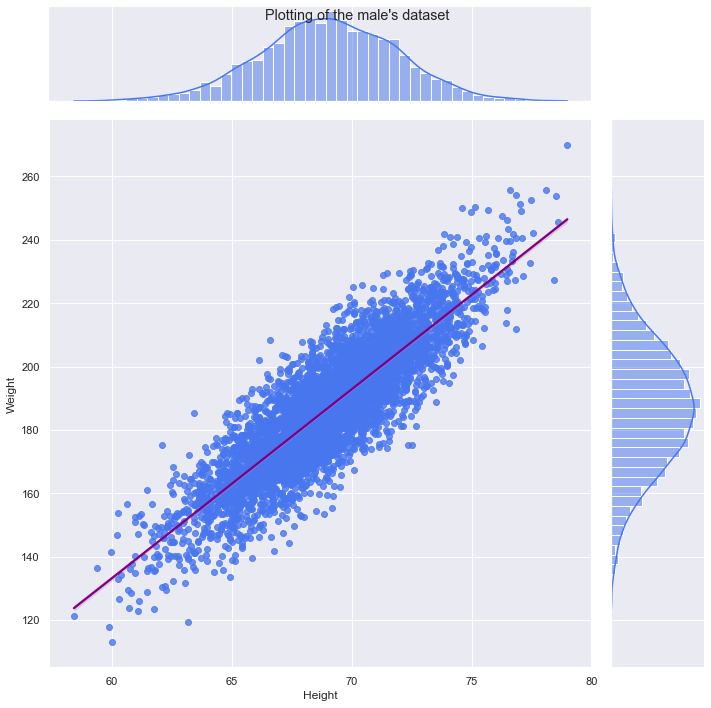

In [28]:
sns.jointplot(data=df_males,x='Height', y='Weight', kind='reg', joint_kws={'line_kws':{'color':'purple'}}, height=10).fig.suptitle('Plotting of the male\'s dataset')

Text(0.5, 0.98, "Plotting of the females' dataset")

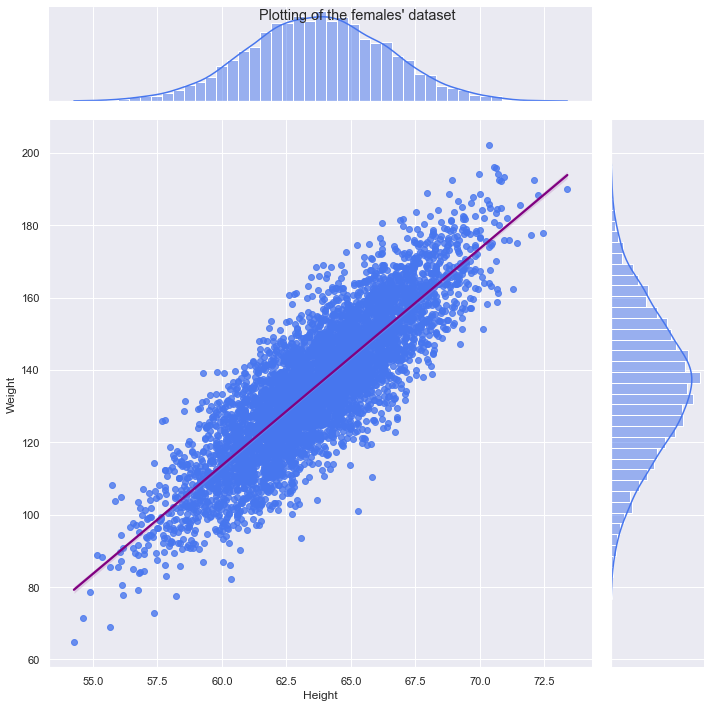

In [29]:
sns.jointplot(data=df_females,x='Height', y='Weight', kind='reg', joint_kws={'line_kws':{'color':'purple'}}, height=10).fig.suptitle('Plotting of the females\' dataset')

Starting with the male's dataset first

In [30]:
Xm = df_males[['Height']] #independent variable
ym = df_males[['Weight']] #dependent variable

In [31]:
#splitting the test data
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state = 1215)

In [32]:
#shape of the test data
print(f'Xm_train size: {Xm_train.shape[0]}\nXm_test size: {Xm_test.shape[0]}\nym_train size: {ym_train.shape[0]}\nym_test size: {ym_test.shape[0]}')

Xm_train size: 4000
Xm_test size: 1000
ym_train size: 4000
ym_test size: 1000


In [33]:
corr_set_m = df_males['Height'].corr(df_males['Weight'])
corr_train_m = Xm_train['Height'].corr(ym_train['Weight'])
print(f'The general correlation of the weight and height in the male\'s dataset is {corr_set_m:.4f}. For the training set it is {corr_train_m:.4f}.')
print(f'The data is less correlated than the general dataset, which had an correlation of {corr_set:.4f} for the dataset, and {corr_train:.4f} for the test set.')

The general correlation of the weight and height in the male's dataset is 0.8630. For the training set it is 0.8640.
The data is less correlated than the general dataset, which had an correlation of 0.9248 for the dataset, and 0.9237 for the test set.


In [34]:
reg1 = LinearRegression()
reg1.fit(Xm_train, ym_train)

LinearRegression()

In [53]:
print(f'The intercept of the males\' regression (theta0) is {reg1.intercept_[0]:.4f}, and the coefficient (theta1, slope) is {reg1.coef_[0][0]:.4f}.')

The intercept of the males' regression (theta0) is -225.4957, and the coefficient (theta1, slope) is 5.9784.


In [36]:
R2m = reg.score(Xm_train,ym_train)
print(f'The model determination coefficient (R²) is {R2m:.4f}. It explains {R2m:.2%} of the variance.\nThis is to be expected because the data is less correlated.')

The model determination coefficient (R²) is 0.6143. It explains 61.43% of the variance.
This is to be expected because the data is less correlated.


<AxesSubplot:title={'center':"Regression with training data for the male's dataset"}, xlabel='Height', ylabel='Weight'>

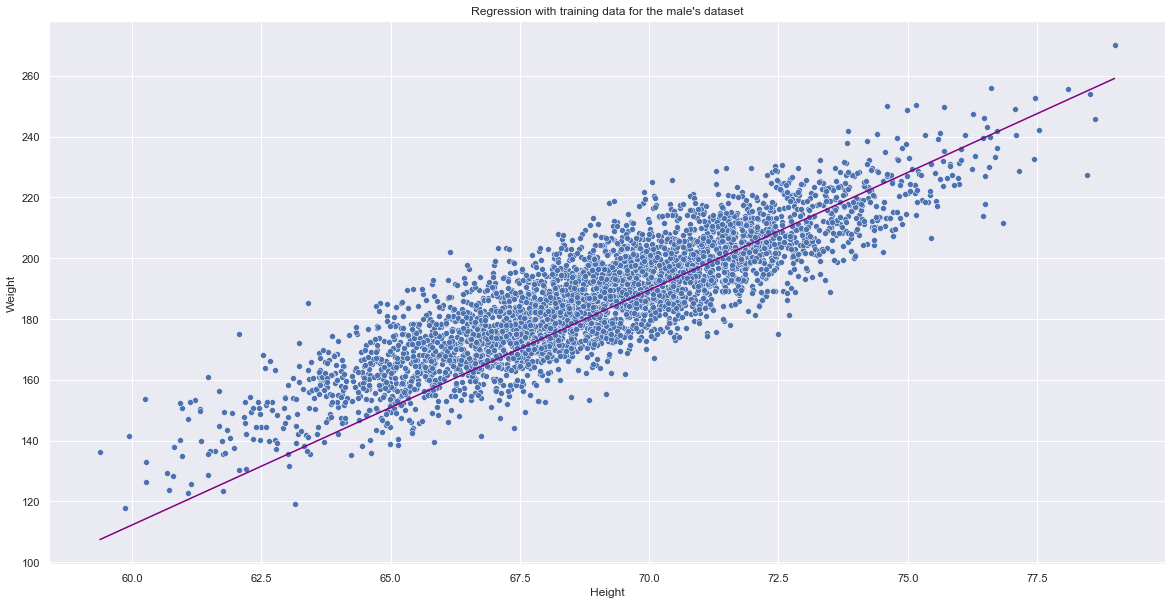

In [51]:
#Plotting the regression
regression_x_m = Xm_train['Height'].to_numpy()
regression_y_m = reg.predict(Xm_train).ravel()
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=Xm_train['Height'], y = ym_train['Weight']).set(title ='Regression with training data for the male\'s dataset')
sns.lineplot(x=regression_x_m, y = regression_y_m, color ='purple')

<AxesSubplot:title={'center':"Regression with test data for the male's dataset"}, xlabel='Height', ylabel='Weight'>

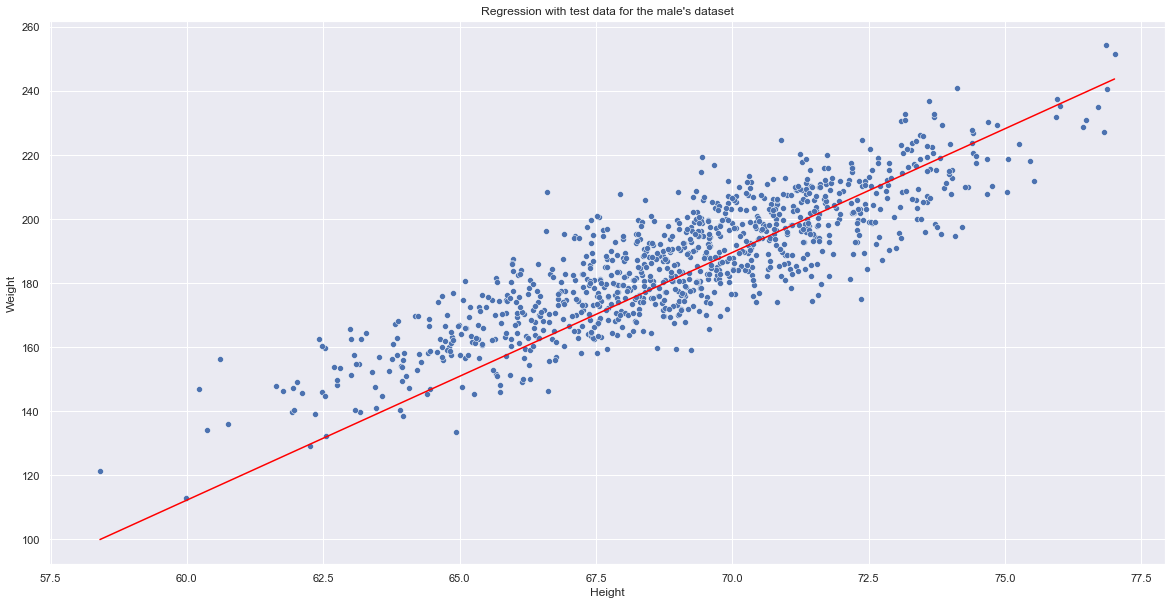

In [52]:
#plotting a prediction
prediction_xm = Xm_test['Height'].to_numpy()
prediction_ym = reg.predict(Xm_test).ravel()
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=Xm_test['Height'], y = ym_test['Weight']).set(title ='Regression with test data for the male\'s dataset')
sns.lineplot(x = prediction_xm, y = prediction_ym, color ='red')

In [39]:
#Showing the error metrics
ym_pred = reg.predict(Xm_test).round(2)
print(f'Mean Absolute Error (MAE) is: {mean_absolute_error(ym_test, ym_pred):.4f}')
print(f'Mean Squared Error (MSE) is: {mean_squared_error(ym_test, ym_pred):.4f}')
print(f'Mean Squared Error (RMSE) is: {mean_squared_error(ym_test, ym_pred, squared=False):.4f}.')
print(f'The model determination coefficient (R²) is {R2m:.4f}.')

Mean Absolute Error (MAE) is: 9.9394
Mean Squared Error (MSE) is: 151.7223
Mean Squared Error (RMSE) is: 12.3176.
The model determination coefficient (R²) is 0.6143.


Now to check the female's dataset

In [40]:
Xf = df_females[['Height']] #independent variable
yf = df_females[['Weight']] #dependent variable

In [41]:
#splitting the test data
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, random_state = 1215)

In [42]:
#shape of the test data
print(f'Xf_train size: {Xf_train.shape[0]}\nXm_test size: {Xf_test.shape[0]}\nym_train size: {yf_train.shape[0]}\nym_test size: {yf_test.shape[0]}')

Xf_train size: 4000
Xm_test size: 1000
ym_train size: 4000
ym_test size: 1000


In [43]:
corr_set_f = df_females['Height'].corr(df_females['Weight'])
corr_train_f = Xf_train['Height'].corr(yf_train['Weight'])
print(f'The general correlation of the weight and height in the female\'s dataset is {corr_set_f:.4f}. For the training set it is {corr_train_f:.4f}.')
print(f'This set\'s data is also less correlated than the general dataset, which had an correlation of {corr_set:.4f} for the dataset, and {corr_train:.4f} for the test set.')

The general correlation of the weight and height in the female's dataset is 0.8496. For the training set it is 0.8501.
This set's data is also less correlated than the general dataset, which had an correlation of 0.9248 for the dataset, and 0.9237 for the test set.


In [44]:
reg2 = LinearRegression()
reg2.fit(Xf_train, yf_train)

LinearRegression()

In [54]:
print(f'The intercept of the female\'s regression (theta0) is {reg2.intercept_[0]:.4f}, and the coefficient (theta1, slope) is {reg2.coef_[0][0]:.4f}.')

The intercept of the female's regression (theta0) is -247.3571, and the coefficient (theta1, slope) is 6.0167.


In [46]:
R2f = reg.score(Xf_train,yf_train)
print(f'The model determination coefficient (R²) is {R2f:.4f}. It explains {R2f:.2%} of the variance.\nIt is also lower than in the whole data.')

The model determination coefficient (R²) is 0.5976. It explains 59.76% of the variance.
It is also lower than in the whole data.


<AxesSubplot:title={'center':"Regression with training data for the female's dataset"}, xlabel='Height', ylabel='Weight'>

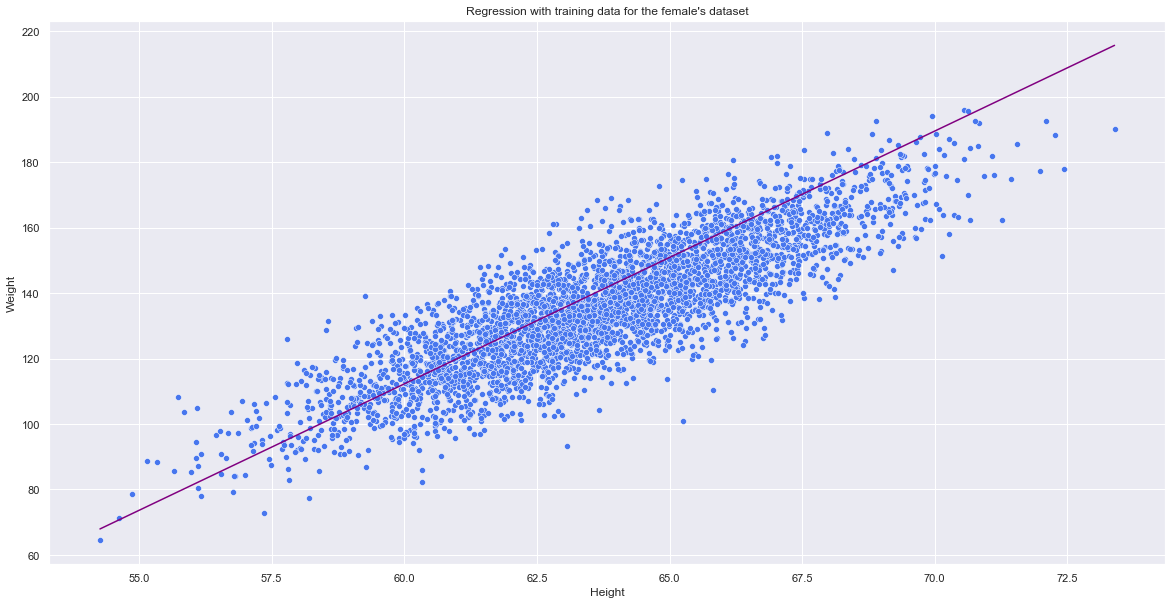

In [47]:
#Plotting the regression
regression_x_f = Xf_train['Height'].to_numpy()
regression_y_f = reg.predict(Xf_train).ravel()
sns.set(palette='turbo', rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=Xf_train['Height'], y = yf_train['Weight']).set(title ='Regression with training data for the female\'s dataset')
sns.lineplot(x=regression_x_f, y = regression_y_f, color ='purple')

<AxesSubplot:title={'center':"Regression with test data for the female's dataset"}, xlabel='Height', ylabel='Weight'>

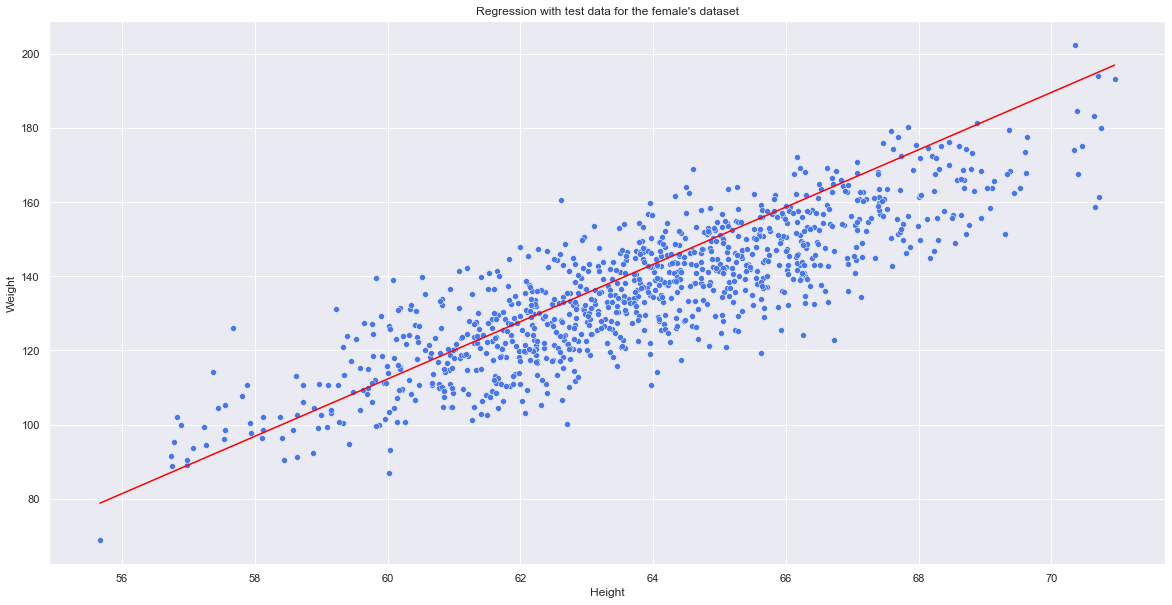

In [48]:
#plotting a prediction
prediction_xf = Xf_test['Height'].to_numpy()
prediction_yf = reg.predict(Xf_test).ravel()
sns.set(palette='turbo', rc={"figure.figsize":(20, 10)})
sns.scatterplot(x=Xf_test['Height'], y = yf_test['Weight']).set(title ='Regression with test data for the female\'s dataset')
sns.lineplot(x = prediction_xf, y = prediction_yf, color ='red')

In [49]:
#Showing the error metrics
yf_pred = reg.predict(Xf_test).round(2)
print(f'Mean Absolute Error (MAE) is: {mean_absolute_error(yf_test, yf_pred):.4f}')
print(f'Mean Squared Error (MSE) is: {mean_squared_error(yf_test, yf_pred):.4f}')
print(f'Mean Squared Error (RMSE) is: {mean_squared_error(yf_test, yf_pred, squared=False):.4f}.')
print(f'The model determination coefficient (R²) is {R2f:.4f}.')

Mean Absolute Error (MAE) is: 9.8583
Mean Squared Error (MSE) is: 154.0474
Mean Squared Error (RMSE) is: 12.4116.
The model determination coefficient (R²) is 0.5976.


## Conclusion:

Splitting the dataset by gender didn't improve the model's determinantion coefficient (R²).